### This Project uses a several features of Banknotes like variance, skewness, curtosis and entropy to predict the Authenticy of  banknotes weither it is Genuine or Forged.This Dataset is taken from UCI Repository.                                                                                      

### Datset Information As per UCI Repository                                                                                                                                                        


Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization,  
an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object  
lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. 
Wavelet Transform tool were used to extract features from images,In this ml model we are considering 0 for geniune bank note 
and 1 for forged bank note.

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#reading the dataset 
#This dataset is taken from  https://archive.ics.uci.edu/ml/datasets/banknote+authentication
df_note=pd.read_csv('Banknote.csv',header=None)

In [4]:
#Defining the columns name of the dataset as per UCI Repository
df_note.columns=['Variance','Skewness','Curtosis','entropy of image','Class']

#### Attribute Information

1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)



In [5]:
#Printing the First five rows of the dataset
df_note.head()

,Variance,Skewness,Curtosis,entropy of image,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [6]:
#printing the last five rows of the dataset
df_note.tail()

,Variance,Skewness,Curtosis,entropy of image,Class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [7]:
#getting outcomes from the dataset
df_note.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Variance          1372 non-null   float64
 1   Skewness          1372 non-null   float64
 2   Curtosis          1372 non-null   float64
 3   entropy of image  1372 non-null   float64
 4   Class             1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


<AxesSubplot:>

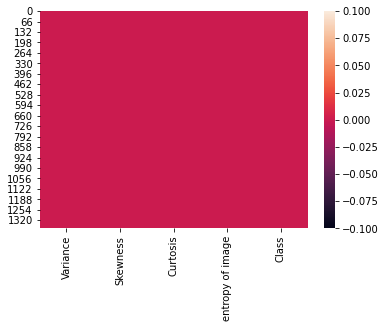

In [8]:
#Using heatmap to see wether the dataset consist of any null values or not
sns.heatmap(df_note.isnull())

##### Univariate Analysis

<AxesSubplot:xlabel='Variance', ylabel='Count'>

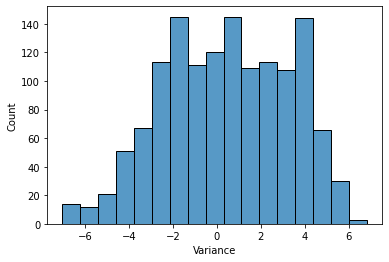

In [9]:
#Using histplot to see the distribution of data in Variance column
sns.histplot(df_note['Variance'])

<AxesSubplot:xlabel='Skewness', ylabel='Count'>

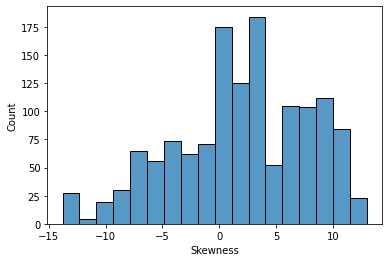

In [10]:
#Using histplot to see the distribution of data in Skewness column
sns.histplot(df_note['Skewness'])

<AxesSubplot:xlabel='Curtosis', ylabel='Count'>

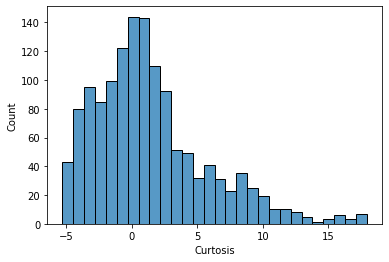

In [11]:
#Using histplot to see the distribution of data in Curtosis column
sns.histplot(df_note['Curtosis'])

<AxesSubplot:xlabel='entropy of image', ylabel='Count'>

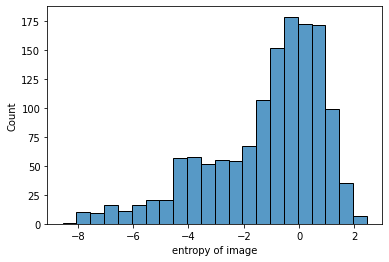

In [12]:
#Using histplot to see the distribution of data in Entropy of image column
sns.histplot(df_note['entropy of image'])

<AxesSubplot:xlabel='Class', ylabel='count'>

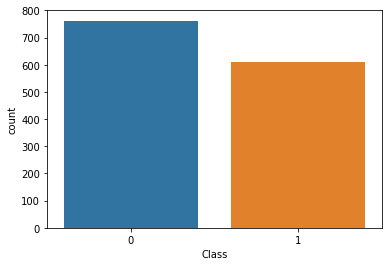

In [13]:
#Countplot to see the number of 0  label and 1 label in the class column
sns.countplot(df_note['Class'])

###### From Univariate Analysis we can clearly see that for 
1. The features such as Variance and Skewness has the Gaussian-like distribution.
2. The feature Curtosis is left skewed whereas the feature entropy of an image is Right skewed.
3. Our Independent feature i.e. Class is normally distributed.  

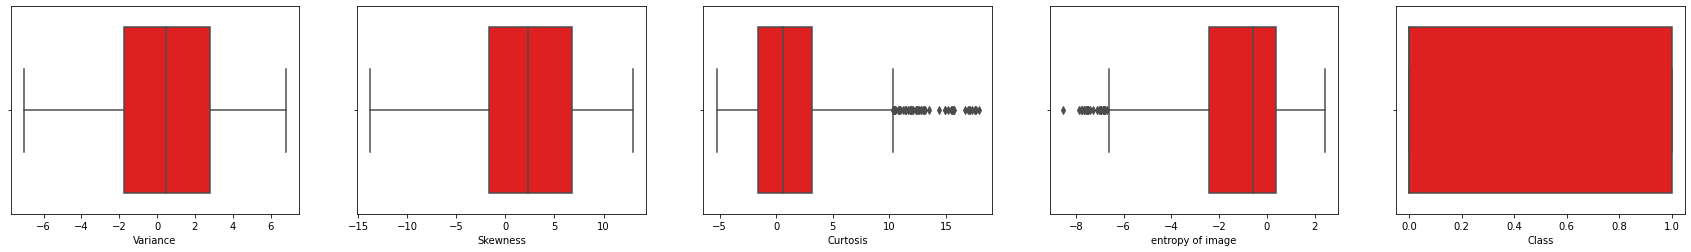

In [14]:
#Plotting Boxplot to see wether there is any outliers present in the dataset or not
collist=df_note.columns.values
ncol=5
nrows=10
plt.figure(figsize=(30,45))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df_note[collist[i]],color='red',orient='v')

From The Boxplot we can see that there are outliers present in the dataset in the features having skewness in them.

##### Statistical Analysis

In [15]:
df_note.describe()

,Variance,Skewness,Curtosis,entropy of image,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [16]:
cor_relation=df_note.corr()

<AxesSubplot:>

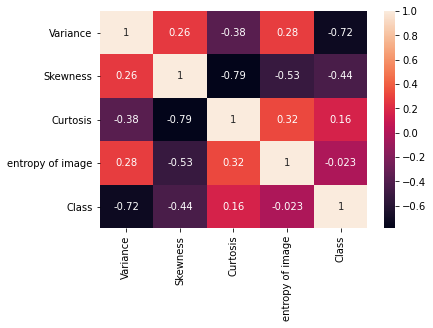

In [17]:
#Plotting correlation  heatmap to see how ech column is related with the dependent column
sns.heatmap(cor_relation, annot=True)

###### Correlation heatmap Analysis
1. The Correlation heatmap shows that Variance is Highly negatively correlated with the dependent feature Class.

2.Only Feature Curtosis is Positively correlated with the Independent feature Class else all the feature are negatively correlated with the Independent feature i,e. class.

##### Removing Outliers and skewness from the dataset

In [18]:
from scipy.stats import zscore
z=np.abs(zscore(df_note))
z

array([[1.12180565, 1.14945512, 0.97597007, 0.35456135, 0.89472059],
       [1.44706568, 1.06445293, 0.89503626, 0.12876744, 0.89472059],
       [1.20780971, 0.77735215, 0.12221838, 0.61807317, 0.89472059],
       ...,
       [1.47235682, 2.62164576, 3.75901744, 0.75488418, 1.11766736],
       [1.40669251, 1.75647104, 2.552043  , 0.04315848, 1.11766736],
       [1.04712236, 0.43982168, 0.29861555, 1.1364645 , 1.11766736]])

In [19]:
threshold=3

In [20]:
#printing all the values which are greater than the threshold value
print(np.where(z>3))

(array([  45,   47,  194,  202,  291,  394,  465,  529,  562,  581,  740,
        765,  820,  826,  881,  887,  942,  948,  974, 1003, 1009, 1064,
       1070, 1125, 1131, 1142, 1186, 1192, 1203, 1218, 1247, 1253, 1264,
       1308, 1314, 1369], dtype=int64), array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2], dtype=int64))


In [21]:
df_new=df_note[(z<3).all(axis=1)]#removing the outliers

In [22]:
#Cheking shape of dataframe before and after removing outliers 
print(df_note.shape)
print(df_new.shape)

(1372, 5)
(1336, 5)


In [23]:
df_new.skew()

Variance           -0.165024
Skewness           -0.298058
Curtosis            0.788075
entropy of image   -0.935068
Class               0.250725
dtype: float64

In [24]:
colllist=df_new.columns.values
for i in range(0,len(colllist)):
    if df_new.skew().loc[colllist[i]]>0.55:
        df_new[colllist[i]]=np.sqrt(df_new[colllist[i]])

In [25]:
df_new.skew()

Variance           -0.165024
Skewness           -0.298058
Curtosis            0.251490
entropy of image   -0.935068
Class               0.250725
dtype: float64

##### Splitting The data into training and testing sets

In [47]:
x=df_note.iloc[:,:-1]

In [27]:
x.head()

,Variance,Skewness,Curtosis,entropy of image
0,3.62160,8.6661,NaN,-0.44699
1,4.54590,8.1674,NaN,-1.46210
2,3.86600,-2.6383,1.387155,0.10645
3,3.45660,9.5228,NaN,-3.59440
4,0.32924,-4.4552,2.138177,-0.98880


In [48]:
y=df_note.iloc[:,-1]

In [49]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [50]:
#Scaling the data in x
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_x=sc.fit_transform(x)

In [51]:
x=df_x
print(x)

[[ 1.12180565  1.14945512 -0.97597007  0.35456135]
 [ 1.44706568  1.06445293 -0.89503626 -0.12876744]
 [ 1.20780971 -0.77735215  0.12221838  0.61807317]
 ...
 [-1.47235682 -2.62164576  3.75901744 -0.75488418]
 [-1.40669251 -1.75647104  2.552043   -0.04315848]
 [-1.04712236 -0.43982168  0.29861555  1.1364645 ]]


In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

#### Developing a Multilayer Perceptron (MLP) model for the dataset using TensorFlow.

In [63]:
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from sklearn.metrics import accuracy_score

In [64]:
#initailising the Ann
classifier=Sequential()

In [65]:
#Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation='relu',input_dim=4))
#Adding the Output layer
classifier.add(Dense(units =1, kernel_initializer = 'glorot_uniform', activation='sigmoid'))

In [66]:
#Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy')

In [67]:
#fitting the model
model_history=classifier.fit(x_train,y_train,batch_size=32,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
35/35 [==============================] - 0s 8ms/step - loss: 0.7366 - val_loss: 0.7011
Epoch 2/100
35/35 [==============================] - 0s 3ms/step - loss: 0.6767 - val_loss: 0.6515
Epoch 3/100
35/35 [==============================] - 0s 3ms/step - loss: 0.6240 - val_loss: 0.6072
Epoch 4/100
35/35 [==============================] - 0s 3ms/step - loss: 0.5764 - val_loss: 0.5690
Epoch 5/100
35/35 [==============================] - 0s 3ms/step - loss: 0.5345 - val_loss: 0.5337
Epoch 6/100
35/35 [==============================] - 0s 3ms/step - loss: 0.4967 - val_loss: 0.5026
Epoch 7/100
35/35 [==============================] - 0s 3ms/step - loss: 0.4630 - val_loss: 0.4749
Epoch 8/100
35/35 [==============================] - 0s 3ms/step - loss: 0.4334 - val_loss: 0.4507
Epoch 9/100
35/35 [==============================] - 0s 3ms/step - loss: 0.4069 - val_loss: 0.4287
Epoch 10/100
35/35 [==============================] - 0s 3ms/step - loss: 0.3827 - val_loss: 0.4081
Epoch 11/

In [114]:
# predicting the model performance with test dataset
y_= classifier.predict_classes(x_test)
#evaluate predictions
score = accuracy_score(y_test,y_)
print('Accuracy: %.3f' % score)

Accuracy: 1.000


Here we have reached a accuracy of Approximately 99%

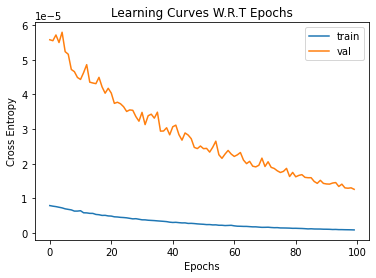

In [122]:
# plot learning curves with respect to Epochs
plt.title('Learning Curves W.R.T Epochs')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy')
plt.plot(model_history.history['loss'], label='train')
plt.plot(model_history.history['val_loss'], label='val')
plt.legend()
plt.show()

#### Using the k-fold cross-validation procedure as it can provide a more reliable estimate of MLP performance, although it can be very slow.

In [72]:
from sklearn.model_selection import StratifiedKFold
from numpy import mean
from numpy import std
kfold = StratifiedKFold(10)
scores = list()
for train_ix, test_ix in kfold.split(x, y):
# splitting the data
    x_train, x_test, y_train, y_test =x[train_ix], x[test_ix], y[train_ix], y[test_ix]
# determining the number of input features
    n_features = x.shape[1]
# Initializin the Ann Model
    Classifier = Sequential()
    Classifier.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
    Classifier.add(Dense(1, activation='sigmoid'))
# compiling the model
    Classifier.compile(optimizer='adam', loss='binary_crossentropy')
# fitting the model
    model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=0)
# predicting the model performance with test set
    yhat = model.predict_classes(x_test)
# evaluating predictions
    score = accuracy_score(y_test, yhat)
    print('>%.3f' % score)
    scores.append(score)
# summarrizing all scores and finding the mean 
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

>1.000
>0.993
>1.000
>0.985
>0.978
>1.000
>0.993
>1.000
>0.985
>0.978
Mean Accuracy: 0.991 (0.009)


Using The cross Validation we have reached the accuracy of approximately 1 

###### Final Model as there is not much difference Between the two ,in this case, we will use the model with dropout and a small batch size as our final model.

In [73]:
#initailising the Ann
classifier=Sequential()
#Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation='relu',input_dim=4))
#Adding the Output layer
classifier.add(Dense(units =1, kernel_initializer = 'glorot_uniform', activation='sigmoid'))
#Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])


In [96]:
#fitting the model
model_history=classifier.fit(x,y,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
92/92 [==============================] - 0s 3ms/step - loss: 7.9132e-06 - accuracy: 1.0000 - val_loss: 5.5749e-05 - val_accuracy: 1.0000
Epoch 2/100
92/92 [==============================] - 0s 2ms/step - loss: 7.7434e-06 - accuracy: 1.0000 - val_loss: 5.5476e-05 - val_accuracy: 1.0000
Epoch 3/100
92/92 [==============================] - 0s 2ms/step - loss: 7.6172e-06 - accuracy: 1.0000 - val_loss: 5.7130e-05 - val_accuracy: 1.0000
Epoch 4/100
92/92 [==============================] - 0s 3ms/step - loss: 7.4329e-06 - accuracy: 1.0000 - val_loss: 5.4951e-05 - val_accuracy: 1.0000
Epoch 5/100
92/92 [==============================] - 0s 3ms/step - loss: 7.2508e-06 - accuracy: 1.0000 - val_loss: 5.7917e-05 - val_accuracy: 1.0000
Epoch 6/100
92/92 [==============================] - 0s 3ms/step - loss: 6.9765e-06 - accuracy: 1.0000 - val_loss: 5.2314e-05 - val_accuracy: 1.0000
Epoch 7/100
92/92 [==============================] - 0s 2ms/step - loss: 6.8198e-06 - accuracy: 1.0000 - v

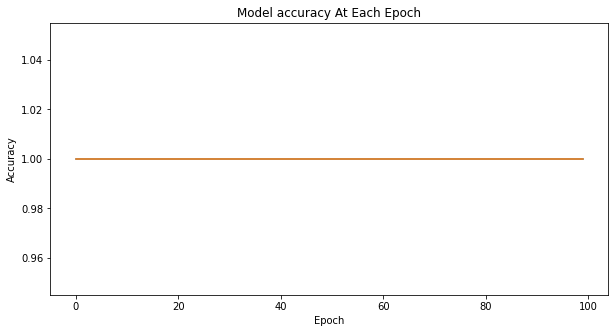

In [111]:
# summarize history for accuracy
plt.figure(figsize=(10,5))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy At Each Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

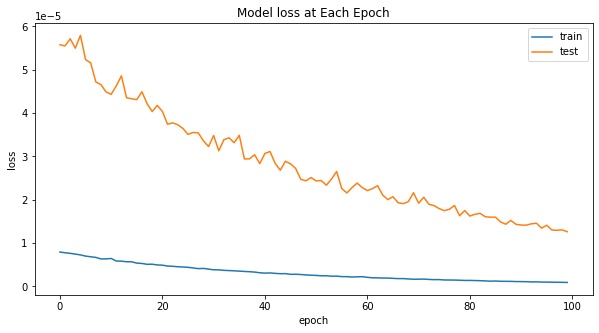

In [112]:
# summarize history for loss
plt.figure(figsize=(10,5))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss at Each Epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [116]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_)

AxesSubplot(0.125,0.808774;0.62x0.0712264)


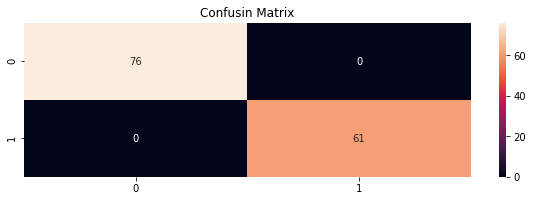

In [118]:
plt.figure(figsize=(10,30))
plt.subplot(911)
plt.title('Confusin Matrix')
print(sns.heatmap(cm,annot=True))

In [120]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        61

    accuracy                           1.00       137
   macro avg       1.00      1.00      1.00       137
weighted avg       1.00      1.00      1.00       137

